### Exercise 1
#### Why feature scaling is important for the k-means algorithm?

Feature scaling is important in k-means because it relies on Euclidean distance, and the
Euclidean distance is highly affected when the input variables are in different ranges.

### Exercise 2
#### How can clustering be used to improve the performance of a linear model?
#### (a) Creating different models for different cluster groups.
#### (b) Creating an input feature for cluster ids as dummy variables.
#### (c) Creating an input feature for cluster centroids as a continuous variable.
#### (d) Creating an input feature for cluster size as a continuous variable.
#### (e) All of the above.
#### (f) None of the above.

Answer: (e) All of the above.

### Exercise 3
#### What are the risks of initial random cluster centroids assignments in k-means?

Bad initialization can lead to poor convergence speed. Also, bad initialization can lead to
bad overall clustering results.

### Exercise 4
#### Consider the Mall Customers.csv data file. This file contains the basic information (ID, age, gender, income, spending score) about a mall customers in the US. In Python, answer the following:
#### (a) Using the pandas library, read the csv data file and create a data-frame called customers. Remove the observations with missing values (if there is missing values).

In [1]:
## Question 
# (a)
import boto3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score

# Defining s3 bucket
s3 = boto3.resource('s3')
bucket_name = 'gabrielferreira-data-455-bucket'
bucket = s3.Bucket(bucket_name)

# Defining the file to be read from s3 bucket
key_file = 'Mall_Customers.csv'

bucket_object = bucket.Object(key_file)
file_object = bucket_object.get()
file_content_stream = file_object.get('Body')

# Reading csv
customers = pd.read_csv(file_content_stream)

customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Checking for missing values
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### There is no missing values

#### (b) Using the appropriate Python commands, put Gender, Age and Annual Income (k$) in the same scale.

In [3]:
# Putting the in the same scale
scale = MinMaxScaler()
customers['Gender_0_1'] = np.where(customers['Gender'] == 'Male', 1, 0)
customers[['Age_0_1', 'Annual Income (k$)_0_1']] = scale.fit_transform(customers[['Age', 'Annual Income (k$)']])
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_0_1,Age_0_1,Annual Income (k$)_0_1
0,1,Male,19,15,39,1,0.019231,0.000000
1,2,Male,21,15,81,1,0.057692,0.000000
2,3,Female,20,16,6,0,0.038462,0.008197
3,4,Female,23,16,77,0,0.096154,0.008197
4,5,Female,31,17,40,0,0.250000,0.016393


#### (c) Because you are not familiar enough with buying patterns in malls, estimate the number of clusters for this dataset using the Calinski-Harabasz, Davies-Bouldin, and Silhouette scores. Do the following:
#### • Using Gender, Age and Annual Income (k$) cluster that data into clusters (k = 2, 3, . . . , 9, 10). Use n init = 20.
#### • For each clustering results, compute the Calinski-Harabasz, Davies-Bouldin, and Silhouette scores.
#### • Visualize the Calinski-Harabasz, Davies-Bouldin, and Silhouette scores.
#### • Estimate the number of clusters.

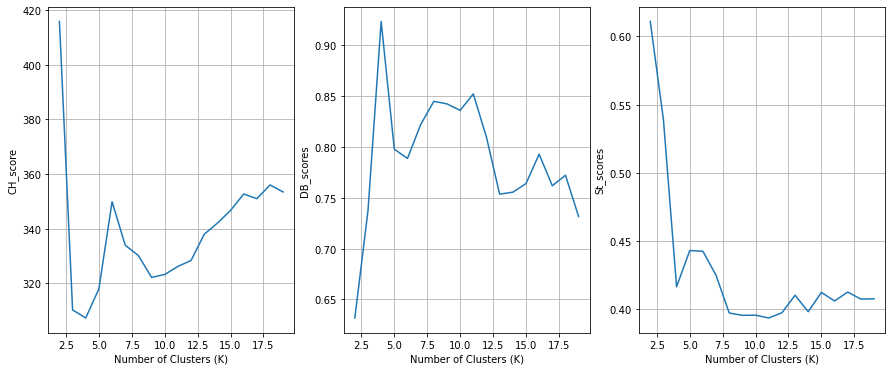

In [4]:
# Defining dataset to fit the model
X = customers[['Gender_0_1', 'Age_0_1', 'Annual Income (k$)_0_1']]

# Defining the number of clusters to be considered
krange = list(range(2, 20))

# Defining list to store scores
CH_scores, DB_scores, St_scores = list(), list(), list()

for clusters in krange:
    
    # Defining the k-means model
    cluster_md = KMeans(n_clusters = clusters, n_init = 20).fit(X)
    cluster_assignments = cluster_md.labels_
    
    # Extracting the CH, DB, and St scores
    CH = calinski_harabasz_score(X, cluster_assignments)
    DB = davies_bouldin_score(X, cluster_assignments)
    St = silhouette_score(X, cluster_assignments)
    
    # Appending scores
    CH_scores.append(CH)
    DB_scores.append(DB)
    St_scores.append(St)
    
# Visualizing the scores
## calinski_harabasz_score
fig, axs = plt.subplots(1, 3, figsize = (15, 6))
axs[0].plot(krange, CH_scores)
axs[0].set_xlabel('Number of Clusters (K)')
axs[0].set_ylabel('CH_score')
axs[0].grid()

## davies_bouldin_score
axs[1].plot(krange, DB_scores)
axs[1].set_xlabel('Number of Clusters (K)')
axs[1].set_ylabel('DB_scores')
axs[1].grid()

## silhouette_score
axs[2].plot(krange, St_scores)
axs[2].set_xlabel('Number of Clusters (K)')
axs[2].set_ylabel('St_scores')
axs[2].grid()


### From the visualization, two cluster seems to be the appropriate number of clusters for the data.

#### (d) Using the results from part (c), cluster the data into that number of clusters (use n init = 20).

In [12]:
cluster_md = KMeans(n_clusters = 2, n_init = 20).fit(X)
customers['Labels'] = cluster_md.labels_
customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_0_1,Age_0_1,Annual Income (k$)_0_1,Labels
0,1,Male,19,15,39,1,0.019231,0.000000,1
1,2,Male,21,15,81,1,0.057692,0.000000,1
2,3,Female,20,16,6,0,0.038462,0.008197,0
3,4,Female,23,16,77,0,0.096154,0.008197,0
4,5,Female,31,17,40,0,0.250000,0.016393,0


#### (e) Describe each of the clusters. Does the clustering results make sense? if not, suggest how would improve this analysis.

In [9]:
cluster_0 = customers[customers['Labels'] == 0]
cluster_0.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_0_1,Age_0_1,Annual Income (k$)_0_1,Labels
count,112.000000,112.000000,112.000000,112.000000,112.0,112.000000,112.000000,112.0
mean,97.562500,38.098214,59.250000,51.526786,0.0,0.386504,0.362705,0.0
std,58.276412,12.644095,26.011952,24.114950,0.0,0.243156,0.213213,0.0
min,3.000000,18.000000,16.000000,5.000000,0.0,0.000000,0.008197,0.0
25%,46.750000,29.000000,39.750000,35.000000,0.0,0.211538,0.202869,0.0
50%,94.500000,35.000000,60.000000,50.000000,0.0,0.326923,0.368852,0.0
75%,148.250000,47.500000,77.250000,73.000000,0.0,0.567308,0.510246,0.0
max,197.000000,68.000000,126.000000,99.000000,0.0,0.961538,0.909836,0.0


#### In the cluster 0, there are 112 women who on avarege are 38 years old with an Annual Income of 36.270 dollars.

In [13]:
cluster_1 = customers[customers['Labels'] == 1]
cluster_1.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_0_1,Age_0_1,Annual Income (k$)_0_1,Labels
count,88.000000,88.000000,88.000000,88.000000,88.0,88.000000,88.000000,88.0
mean,104.238636,39.806818,62.227273,48.511364,1.0,0.419362,0.387109,1.0
std,57.483830,15.514812,26.638373,27.896770,0.0,0.298362,0.218347,0.0
min,1.000000,18.000000,15.000000,1.000000,1.0,0.000000,0.000000,1.0
25%,59.500000,27.750000,45.500000,24.500000,1.0,0.187500,0.250000,1.0
50%,106.500000,37.000000,62.500000,50.000000,1.0,0.365385,0.389344,1.0
75%,151.250000,50.500000,78.000000,70.000000,1.0,0.625000,0.516393,1.0
max,200.000000,70.000000,137.000000,97.000000,1.0,1.000000,1.000000,1.0


#### In the cluster 1, there are 88 men who on avarege are 41 years old with an Annual Income of 38.710 dollars.

### The results don't make much sense because one the clusters is only female observations and the other one is male observations. Besides that there is no another clear difference between the clusters. I would try to improve the clustering results by adding more variables such as the products bought, online interaction, etc.